# Probability

FIXME - Convert to use pd.Series instread pd.DataFrame

## Experiment

In [1]:
from probability.experiment import Experiment, Occurrence

experiment = Experiment('Coin')
experiment

Series([], dtype: float64)

In [2]:
experiment.register(Occurrence('head'))
experiment.register(Occurrence('tails'))

experiment

Coin
head     1
tails    1
dtype: int64

In [3]:
experiment = Experiment('Coin')

experiment.register(Occurrence('head', 4))
experiment.register(Occurrence('tails', 3))
experiment.register(Occurrence('head'))

experiment.calcule()

Coin
head     0.625
tails    0.375
dtype: float64

In [4]:
experiment = Experiment('Coin', 'Ball')

experiment.register(Occurrence(['head', 'red'], 5))
experiment.register(Occurrence(['tails', 'blue']))
experiment.register(Occurrence(['tails', 'yellow'], 2))
experiment.register(Occurrence(['head', 'blue'], 2))

experiment.calcule()

Coin   Ball  
head   blue      0.2
       red       0.5
tails  blue      0.1
       yellow    0.2
dtype: float64

## Event and counter

In [5]:
from collections import Counter

lorem_ipsum = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nunc tincidunt, erat ut ultrices scelerisque, ex tortor sagittis nulla, feugiat fermentum dolor nisl sit amet arcu. Pellentesque tincidunt luctus augue, a suscipit tortor porttitor sed. Sed lacinia felis non ante sagittis, non auctor turpis mollis. In tincidunt tincidunt justo. Phasellus sed sapien ultricies, malesuada neque id, facilisis arcu. Sed volutpat nisl in iaculis varius. Donec porttitor tellus non sem volutpat, convallis ullamcorper magna vehicula. Proin dapibus risus ac erat pretium imperdiet. Vivamus mattis magna quis sem pellentesque ullamcorper. Morbi eget lorem eu ante condimentum pretium sollicitudin sit amet tortor. In eget tristique felis, sit amet tincidunt eros. Phasellus auctor id dolor a pellentesque. Nullam et eros dignissim, commodo libero vitae, malesuada purus. Cras tincidunt urna quis erat sagittis, sed porta turpis porta. Vestibulum quam nunc, aliquam aliquam ipsum quis, fermentum aliquet eros. Donec ut lorem ac dui rhoncus scelerisque."
counter = Counter(lorem_ipsum.lower())
counter

Counter({' ': 147,
         ',': 15,
         '.': 17,
         'a': 63,
         'b': 4,
         'c': 37,
         'd': 28,
         'e': 83,
         'f': 6,
         'g': 11,
         'h': 4,
         'i': 90,
         'j': 1,
         'l': 55,
         'm': 38,
         'n': 53,
         'o': 48,
         'p': 26,
         'q': 14,
         'r': 54,
         's': 73,
         't': 85,
         'u': 73,
         'v': 9,
         'x': 1})

In [6]:
experiment = Experiment.from_counter(counter, 'Letter')

experiment.calcule()

Letter
     0.142029
,    0.014493
.    0.016425
a    0.060870
b    0.003865
c    0.035749
d    0.027053
e    0.080193
f    0.005797
g    0.010628
h    0.003865
i    0.086957
j    0.000966
l    0.053140
m    0.036715
n    0.051208
o    0.046377
p    0.025121
q    0.013527
r    0.052174
s    0.070531
t    0.082126
u    0.070531
v    0.008696
x    0.000966
dtype: float64

## Probability Distribution

### From experiment

In [7]:
from probability.probability_distribution import ProbabilityDistribution

P = ProbabilityDistribution.from_experiment(experiment)
P

Letter
     0.142029
,    0.014493
.    0.016425
a    0.060870
b    0.003865
c    0.035749
d    0.027053
e    0.080193
f    0.005797
g    0.010628
h    0.003865
i    0.086957
j    0.000966
l    0.053140
m    0.036715
n    0.051208
o    0.046377
p    0.025121
q    0.013527
r    0.052174
s    0.070531
t    0.082126
u    0.070531
v    0.008696
x    0.000966
dtype: float64

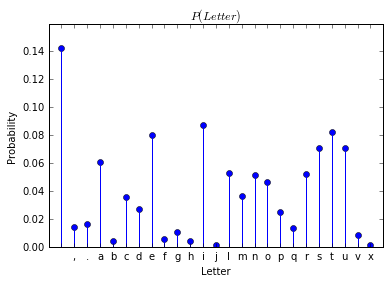

In [8]:
%matplotlib inline 

P.plot().show()

### From joint distribution

In [9]:
import pandas as pd

distribution = [
    ['low',  'A', 0.07],
    ['low',  'B', 0.28],
    ['low',  'C', 0.35],
    ['high', 'A', 0.18],
    ['high', 'B', 0.09],
    ['high', 'C', 0.03],
]

variables = ['Intelligence', 'Grade', 'probability']

P = ProbabilityDistribution.from_joint_distribution(pd.DataFrame(distribution, columns=variables))
P

  Intelligence Grade  probability
0          low     A         0.07
1          low     B         0.28
2          low     C         0.35
3         high     A         0.18
4         high     B         0.09
5         high     C         0.03

## Probability Distribution attributes

In [10]:
P.variables

AttributeError: 'ProbabilityDistribution' object has no attribute 'data'

### Probability Distribution operations

#### $P(∅) = 0$

In [ ]:
P()

#### Value ????????????????????

In [ ]:
Intelligence, Grade = P.variables

P(Intelligence=='low')

In [ ]:
P('low')

In [ ]:
P('low', 'B')

#### Union

$P(α ∪ β) = P(α) + P(β) − P(α ∩ β)$

In [ ]:
Intelligence, Grade = P.variables

P(Intelligence.union(Grade=='B'))

#### Intersection

$P ((X = x) ∩ (Y = y))$ or $P(X=x, Y=y)$ or just $P(x, y)$

In [ ]:
Intelligence, Grade = P.variables

P(Intelligence=='high', Grade=='B')

#### Marginal distribution

$P(X)$

In [ ]:
P(Intelligence)

In [ ]:
P.marginal(Intelligence)

#### Joint distribution

In [ ]:
P(Intelligence, Grade)

In [ ]:
P.joint_distribution(Intelligence, Grade)

#### Conditional Probability

In [ ]:
P(Intelligence | Grade)

In [ ]:
P(Intelligence | (Grade=='A'))

In [ ]:
a = P((Intelligence=='high') | (Grade=='A'))

In [ ]:
joint_conditional_probability = P(Intelligence | Grade)
joint_conditional_probability(Intelligence=='high', Grade=='A')

#### Independence

In [ ]:
P((Intelligence=='high') | (Grade=='A')) == P(Intelligence=='high') or P(Grade=='A') == 0